<a href="https://colab.research.google.com/github/dlbkv/AI-Step/blob/lectures/module3/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лінійна регресія

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Визначення
Регресія -- це алгоритм **моделювання зв'язку** між залежною числовою ознакою та однією чи декількома залежними ознаками.

Мета лінійної регресії – знайти **лінійний зв’язок** між змінними, який можна використовувати для прогнозування залежної ознаки.

##Типи лінійної регресії
Існує два типи лінійної регресії: **проста** лінійна регресія та **множинна** лінійна регресія. Проста лінійна регресія включає лише одну незалежну змінну, тоді як множинна лінійна регресія включає дві або більше незалежних змінних.

## Проста лінійна регресія


$$y = \beta + \alpha*X $$

де:

* $y$ – залежна змінна
* $X$ – незалежна змінна
* $\beta$ – зсув (intercept)
* $\alpha$ – ваговий множник(нахил, intercept)

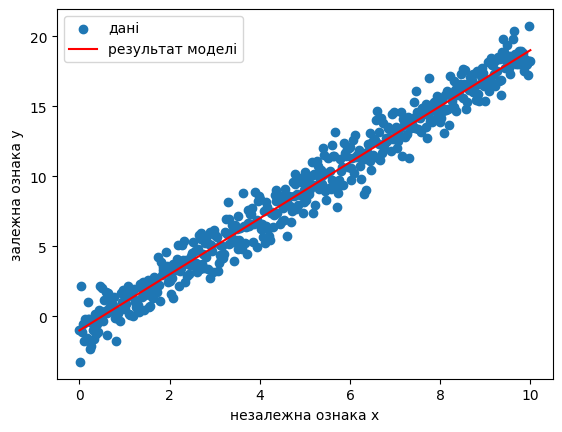

In [ ]:
x = np.linspace(0, 10, 500)

y = 2*x - 1 + np.random.normal(size=x.shape)

plt.scatter(x, y, label="дані")
plt.plot([0, 10], [-1, 19], c="red", label="результат моделі")
plt.xlabel("незалежна ознака x")
plt.ylabel("залежна ознака y")
plt.legend()

## Множинна лінійна регресія

$$Y = \beta + \alpha_1*X_1 + \alpha_2*X_2 + \cdots + \alpha_n*X_n$$

де:
* $Y:$ залежна змінна
* $X_1, X_2, X_3, X_4:$ Незалежні змінні
* $\beta:$ зсув (intercept)
* $\alpha_1, \alpha_2, \cdots, \alpha_n:$ коефіцієнти(вагові множники, coefficients)

<img src = "https://miro.medium.com/max/875/1*dToo8pNrhBmYfwmPLp6WrQ.png">

## Scikit-learn

### Імпорт даних

[Інформація](https://search.r-project.org/CRAN/refmans/PPtreeregViz/html/insurance.html)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
def remove_outliers(df, column_name):
  column = df[column_name]

  q1 = column.quantile(q=0.25)
  q3 = column.quantile(q=0.75)

  iqr = q3 - q1

  lower = q1 - 1.5*iqr
  upper = q3 + 1.5*iqr

  mask = (column >= lower) & (column <= upper)

  return df[mask]

for column_name in df.columns:
  if df.dtypes[column_name] in ("object", "datetime64[ns]"):
    continue

  df = remove_outliers(df, column_name)

In [ ]:
df.shape

(1191, 7)

###Поділ даних на залежну та незалежну ознаки

In [ ]:
y = df["expenses"]
X = df.drop(columns=["expenses"])

### Обробка категоріальних ознак

In [ ]:
X = pd.get_dummies(X)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0
2,28,33.0,3,0,1,1,0,0,0,1,0
3,33,22.7,0,0,1,1,0,0,1,0,0
4,32,28.9,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,0,1,1,0,0,1,0,0
1334,18,31.9,0,1,0,1,0,1,0,0,0
1335,18,36.9,0,1,0,1,0,0,0,1,0
1336,21,25.8,0,1,0,1,0,0,0,0,1


### Поділ на тренувальні та тестові дані

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,  # частка даних для навчання
                                                    random_state=42) # зерно для генератора випадкових чисел

###Модель

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# тренування
model.fit(X_train, y_train)

LinearRegression()

### Використання

In [ ]:
y_pred = model.predict(X_test)

##Метрики

Метрики -- це числові характеристики для оцінки ефективності моделі:

* Середнє квадратичне відхилення (MSE)
* Корінь середньоквадратичного відхилення (RMSE).
* Середнє абсолютне відхилення (MAE).
* R² або коефіцієнт детермінації.
* Скоригований R²

### Середнє квадратичне відхилення:

`MSE або середнє квадратичне відхилення` є однією із найбільш частовживаних метрик для завдань регресії.

Це просто середнє значення квадрата різниці між цільовим значенням і значенням, передбаченим регресійною моделлю.

Зводячи різницю в квадрат, він штрафує навіть невелику помилку, яка призводить до переоцінки того, наскільки погана модель.

Дану метрику часто використовують також тому, що вона є диференційованою(пізніше обговоримо).


<img src = "https://miro.medium.com/max/875/0*aTUPK_ILg7-n0znw.jpg">

### Корінь середньо квадратичного відхилення:

RMSE є найбільш широко використовуваною метрикою для задач регресії та є квадратним коренем із середньо квадратичного відхилення між цільовим значенням і значенням, передбаченим моделлю.

У деяких випадках це краще, тому що помилки спочатку зводяться в квадрат перед усередненням, що створює високий штраф за великі помилки.

Це означає, що RMSE є корисним, коли чутливість моделі до великих помилок небажана.

<img src = "https://miro.medium.com/max/650/0*TO7BkvQwtnvVzkK4.png">

### Середня абсолютне відхилення:

MAE — це модуль різниці між цільовим значенням і значенням, передбаченим моделлю.

MAE більш стійие до викидів і не штрафує за помилки так сильно, як mse.

MAE — це лінійна оцінка, яка означає, що всі індивідуальні відмінності зважені однаково.

Він не підходить для задач, де потрібно приділяти більше уваги викидам.

<img src = "https://miro.medium.com/proxy/0*zX9jlpZ8k0CuEpFE.jpg">

### R²

Коефіцієнт детермінації або R² — ще один показник, який використовується для оцінки ефективності регресійної моделі.

Метрика допомагає нам порівнювати наскільки краща наша модель за базову модель, яка завжди прогнозує середнє арифметичне, або медіану.

R² – це безмасштабна оцінка, яка означає, що значення R² завжди буде меншим або дорівнює 1, не має значення, чи є значення занадто великими чи занадто малими.

Значення в 1 означає, що модель хороша, 0 - що така сама як базова

<img src = "https://miro.medium.com/max/783/0*_Bk3m941thWlveS3.png">

### Скоригований R²:

Скоригований R² має те саме значення, що й R², але є його вдосконаленням.

R² страждає від проблеми, пов’язаної з підвищенням значенням при збільшені кількості незалежних ознак, навіть якщо модель не покращується, що може ввести дослідника в оману.

Скоригований R² завжди нижчий за R², оскільки він коригується з урахуванням кількості ознак і показує покращення, лише якщо є реальне покращення.

<img src = "https://miro.medium.com/max/495/0*WkdWEm2993yhYvUA.png">

In [ ]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [ ]:
all_metrics = pd.DataFrame()

In [ ]:
all_metrics["train"] = get_metrics(y_train, model.predict(X_train))
all_metrics["test"] = get_metrics(y_test, y_pred)
all_metrics["mean"] = get_metrics(y_test, np.full_like(y_test, y_test.mean()), "mean")

In [ ]:
all_metrics

,train,test,mean
MAE,2481.42,2621.06,5867.03
MSE,20543062.96,19879616.53,54135156.05
RMSE,4532.45,4458.66,7357.66
R2,0.60,0.63,0.00


##Припущення лінійної регресії
Перш ніж будувати модель лінійної регресії, важливо переконатися, що дані задовольняють певним вимогам або припущенням. Ці припущення включають **лінійність, незалежність, гомоскедастичність** і **нормальність**.



Гомоскедастичність: Дисперсія залишків має бути постійною на всіх рівнях незалежних змінних. Іншими словами, розкид залишків має бути однаковим для всіх прогнозованих значень.
Нормальність: залишки повинні мати нормальний розподіл. Це означає, що більшість залишків має бути близькою до нуля, а розподіл залишків має нагадувати дзвоноподібну криву.
Відсутність мультиколінеарності: незалежні змінні не повинні сильно корелювати одна з одною. Мультиколінеарність може призвести до ненадійних і нестабільних оцінок коефіцієнтів.

###Лінійність:
Зв’язок між незалежною ознакою y та залежною ознакою(бо ознаками) X має бути лінійним. Іншими словами, кожна ознака X повинна мати досить високий коефіцієнт кореляції Пірсона з ознакою y.

###Відсутність мультиколінеарності:
Незалежні змінні не повинні сильно корелювати одна з одною. Мультиколінеарність може призвести до ненадійних і нестабільних оцінок коефіцієнтів.

<ipython-input-227-0534cb6afdfa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method="pearson")


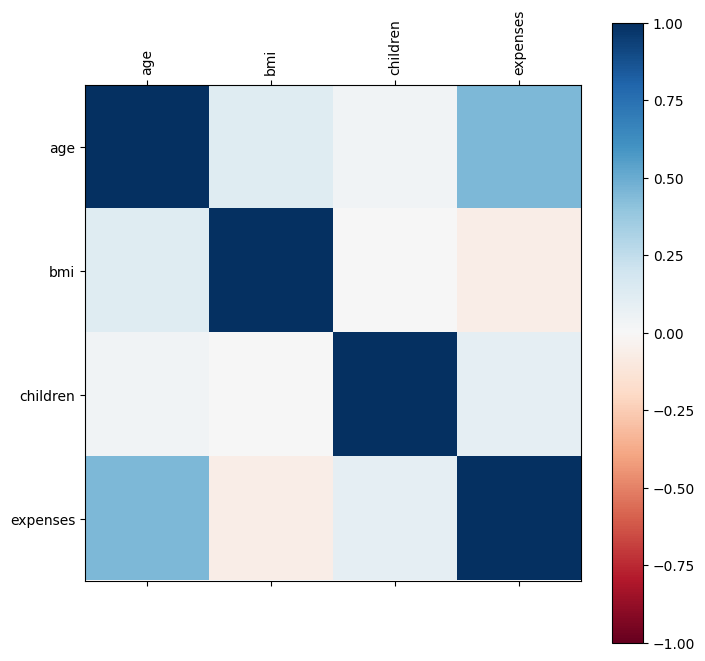

In [ ]:
corr = df.corr(method="pearson")

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)

plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.clim(-1, 1)

###Нормальність всіх ознак:
Всі ознаки повинні мати нормальний(або гаусовий) розподіл. Це означає, що їхні гістограми повинні нагадувати симетричну дзвоноподібну криву.

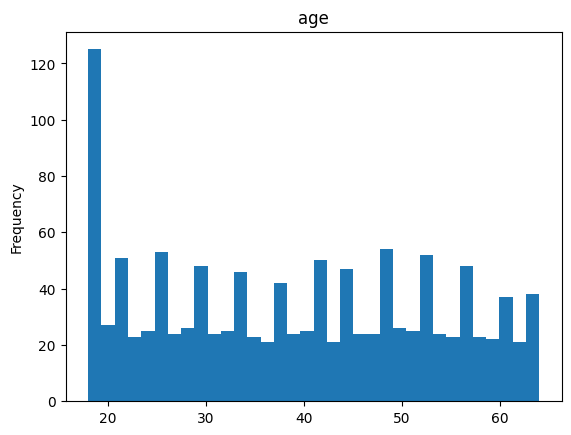

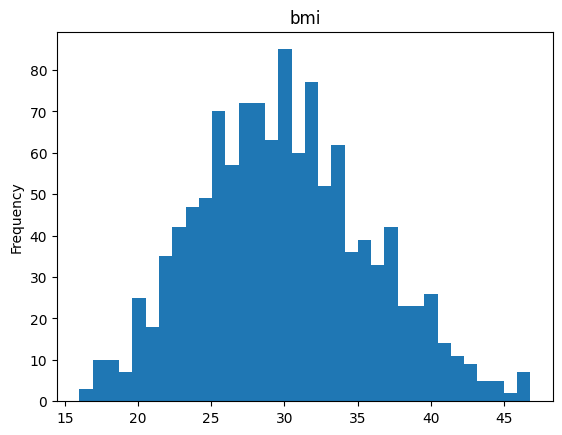

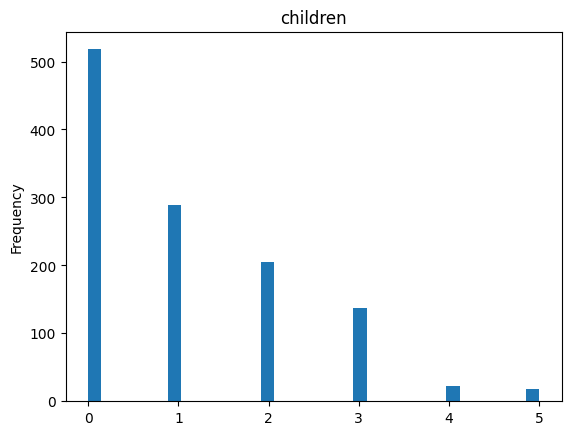

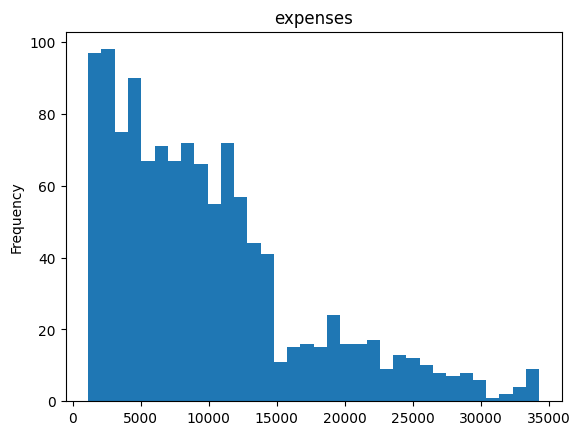

In [ ]:
bins = int(np.sqrt(len(df)))

for column in df.columns:
  if df.dtypes[column] in (int, float):
    df[column].plot(kind="hist", bins=bins)
    plt.title(column)
    plt.show()

###Незалежність залишків:
Залишки (різниця між прогнозованими та фактичними значеннями) мають бути незалежними один від одного. Це означає, що помилка в прогнозуванні однієї точки даних не повинна впливати на помилку в прогнозуванні іншої точки даних.

Text(0.5, 1.0, 'Залишки - номер спостереження')

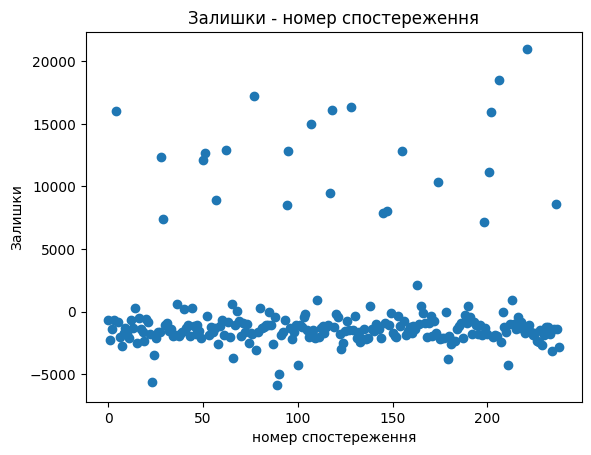

In [ ]:
res = y_test - y_pred

plt.scatter(range(len(res)), res)
plt.xlabel("номер спостереження")
plt.ylabel("Залишки")
plt.title("Залишки - номер спостереження")

###Однорідність дисперсії(Homoscedasticity):
Стандартне відхилення залишків має бути однаковим для всіх прогнозованих значень.

<img src="https://i.ibb.co/3dJ1Cpj/homoskedasticity.png">

Text(0.5, 1.0, 'Залишки - прогноз')

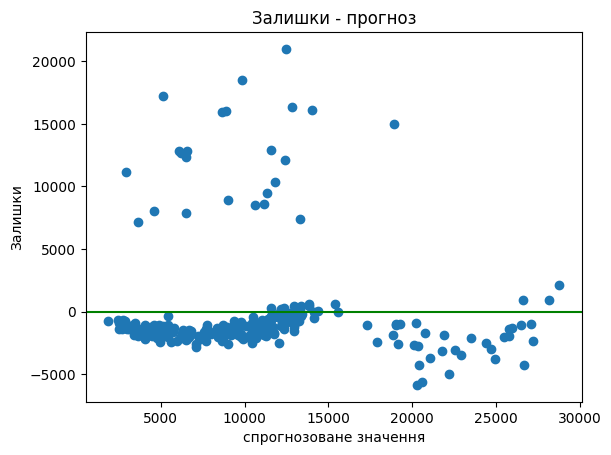

In [ ]:
plt.scatter(y_pred, res)
plt.axhline(0, color="green")
plt.xlabel("спрогнозоване значення")
plt.ylabel("Залишки")
plt.title("Залишки - прогноз")

###Нормальність залишків:
Залишки повинні мати нормальний розподіл. Це означає, що більшість залишків має бути близькою до нуля, а гістограма залишків має нагадувати симетричну дзвоноподібну криву.

(array([ 2.,  2.,  3.,  6., 44., 86., 51., 14.,  6.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  2.,  2.,  3.,  1.,  1.,  1.,  1.,  5.,  0.,  0.,
         1.,  3.,  1.,  1.,  1.,  0.,  0.,  1.]),
 array([-5847.8240333 , -5058.6742277 , -4269.52442209, -3480.37461648,
        -2691.22481088, -1902.07500527, -1112.92519966,  -323.77539405,
          465.37441155,  1254.52421716,  2043.67402277,  2832.82382837,
         3621.97363398,  4411.12343959,  5200.27324519,  5989.4230508 ,
         6778.57285641,  7567.72266201,  8356.87246762,  9146.02227323,
         9935.17207883, 10724.32188444, 11513.47169005, 12302.62149565,
        13091.77130126, 13880.92110687, 14670.07091247, 15459.22071808,
        16248.37052369, 17037.52032929, 17826.6701349 , 18615.81994051,
        19404.96974611, 20194.11955172, 20983.26935733]),
 <BarContainer object of 34 artists>)

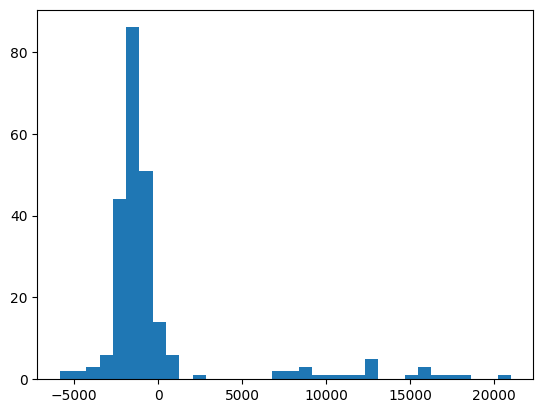

In [ ]:
plt.hist(res, bins=bins)

## Покращення

### Попередня обробка даних

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, PolynomialFeatures

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


Для початку нам потрібно отримати назви стовпчиків з числовими та категоріальними ознаками, тому що для них обробка буде відрізнятися

In [ ]:
y = df["expenses"]
X = df.drop(columns=["expenses"])

num_columns = X.select_dtypes(include="number").columns
cat_columns = X.select_dtypes(include="object").columns

Для числових ознак застосовуємо наступну обробку:
* заповнюємо пропущені значення в кожному стовпчику його медіаною
* нормалізуємо стовпчики так, щоб вонт малт нормальний розподіл

In [ ]:
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")),
           ("scaler", PowerTransformer())
           ]
    )

Для категоріальних ознак застосовуємо наступну обробку:
* заповнюємо пропущені значення в кожному стовпчику значенням, яке найчастіше зустрічається
* застосовуємо кодування, подібне до `pd.get_dummies`

In [ ]:
cat_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")),
           ("encoder", OneHotEncoder())])

Об'єднуємо обробку числових і категоріальних ознак в одну

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_columns),
        ("cat", cat_transformer, cat_columns),
    ]
)

preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler',
                                                  PowerTransformer())]),
                                 Index(['age', 'bmi', 'children'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder', OneHotEncoder())]),
                                 Index(['sex', 'smoker', 'region'], dtype='object'))])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,  # частка даних для навчання
                                                    random_state=42)

Створюємо нову модель

In [ ]:
model2 = Pipeline(
    [("prep", preprocessor),
     ("model", LinearRegression())
     ]
)

model2

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['age', 'bmi', 'children'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('model', LinearRegression())])

In [ ]:
model2.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['age', 'bmi', 'children'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('model', LinearRegression())])

### Метрики нової моделі

In [ ]:
all_metrics["train with prep"] = get_metrics(y_train, model2.predict(X_train))
all_metrics["test with prep"] = get_metrics(y_test, model2.predict(X_test))

In [ ]:
all_metrics

,train,test,mean,train with prep,test with prep
MAE,2481.42,2621.06,5867.03,2563.47,2713.96
MSE,20543062.96,19879616.53,54135156.05,20958149.36,20183319.64
RMSE,4532.45,4458.66,7357.66,4578.01,4492.58
R2,0.60,0.63,0.00,0.59,0.63


### Лише частина ознак

In [ ]:
y = df["expenses"]
X = df.drop(columns=["expenses", "sex", "region"])
X["smoker"] = X["smoker"].map({"yes":1, "no":0})

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,  # частка даних для навчання
                                                    random_state=42)

In [ ]:
X_train.head()

,age,bmi,children,smoker
253,27,30.3,3,0
778,35,34.3,3,0
735,49,34.8,1,0
483,51,39.5,1,0
877,33,33.4,5,0


In [ ]:
model3 = LinearRegression()

model3.fit(X_train, y_train)

LinearRegression()

In [ ]:
all_metrics["train with num"] = get_metrics(y_train, model3.predict(X_train))
all_metrics["test with num"] = get_metrics(y_test, model3.predict(X_test))

In [ ]:
all_metrics

,train,test,mean,train with prep,test with prep,train with num,test with num
MAE,2481.42,2621.06,5867.03,2563.47,2713.96,2497.53,2689.00
MSE,20543062.96,19879616.53,54135156.05,20958149.36,20183319.64,20787382.64,20510314.54
RMSE,4532.45,4458.66,7357.66,4578.01,4492.58,4559.32,4528.83
R2,0.60,0.63,0.00,0.59,0.63,0.59,0.62


## Збереження

In [ ]:
import joblib
joblib.dump(model2, 'my_model.pkl')

['my_model.pkl']

In [ ]:
load_model = joblib.load('my_model.pkl')
load_model

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   PowerTransformer())]),
                                                  Index(['age', 'bmi', 'children'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['sex', 'smoker', 'region'], dtype='object'))])),
                ('model', LinearRegression())])